<a href="https://colab.research.google.com/github/drbasselALKHATIB/ArabicSentimentsAnalysis/blob/master/asa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
!pip install pandas
!pip install snowballstemmer 
!pip install wordcloud
!pip install python-bidi
!pip install arabic-reshaper
!pip install matplotlib
!pip install keras==2.6.0
!pip install Keras-Preprocessing==1.1.2
!pip install sklearn
!pip install seaborn
!pip install tensorflow==2.6.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hadjer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hadjer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 252.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 291.5 kB/s eta 0:00:01
   -------------- -------------

  Obtaining dependency information for Keras-Preprocessing==1.1.2 from https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 344.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.6.0


In [3]:
import pandas as pd
# رفع الملفات اللازمة
# Google Colab
#from google.colab import files
#uploaded = files.upload()
# قراءة التغريدات وتحميلها ضمن إطار من البيانات 
tweets_data = pd.read_csv('tweets.csv',encoding = "utf-8")
# الاقتصار على عمود التغردات
tweets = tweets_data[['tweet']]
# إظهار الجزء الأعلى من إطار البيانات
tweets.head()

,tweet
0,احد خيارات التنزهة بمدينة الرياض حديقة الحيوان...
1,حديقة جميلة للاطفال وسعر دخول ممتاز واكشاك بس...
2,ممتاز جدا عندي بس بعض الملاحظات والاقتراحات\n١...
3,حديقة منظمة وبها عديد كبير من الحيوانات\nالخدم...
4,فيه تجديدات حلوة ومكان جميل وسعر مناسب، نتمنى ...


In [6]:
# قراءة قاموس الكلمات الموجبة
positive_data = pd.read_csv('positive.csv' ,encoding = "utf-8")
positive = positive_data[['word', 'polarity']]
# قراءة قاموس الكلمات السالبة
negative_data = pd.read_csv('negative.csv' ,encoding = "utf-8")
negative = negative_data[['word', 'polarity']]
positive.head()
negative.tail()

,word,polarity
1114,صعب,-2
1115,الخيبه,-3
1116,فاحش,-1
1117,زائد,-2
1118,مخيسة,-3


In [7]:

# مكتبة  السلاسل النصية 
import string
# مكتبة التعابير النظامية
import re
# مكتبة معالجة اللغات الطبيعية
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
# مكتبة  كلمات التوقف
from nltk.corpus import stopwords
# مكتبة استخراج الوحدات
from nltk.tokenize import word_tokenize
# مكتبة المجذع العربي
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")

# دالة حذف المحارف غير اللازمة
def remove_chars(text, del_chars):
    translator = str.maketrans('', '', del_chars)
    return text.translate(translator)
# دالة حذف المحارف المكررة
def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)
# دالة تنظيف النصوص
def cleaningText(text):
    # حذف الأرقام
    text = re.sub(r'[0-9]+', '', text)  
    # حذف المحارف غير اللازمة
    # علامات الترقيم العربية
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    # علامات الترقيم الانكليزية
    english_punctuations = string.punctuation
    # دمج علامات الترقيم العربية والانكليزية
    punctuations_list = arabic_punctuations + english_punctuations
    text = remove_chars(text, punctuations_list)
    # حذف المحارف المكررة  
    text = remove_repeating_char(text)
    # استبدال الأسطر الجديدة بفراغات  
    text = text.replace('\n', ' ')  
    # حذف الفراغات الزائدة من اليمين واليسار   
    text = text.strip(' ')  
    return text
# دالة تقسيم النص إلى مجموعة من الوحدات
def tokenizingText(text): 
    tokens_list = word_tokenize(text) 
    return tokens_list
# دالة حذف كلمات التوقف
def filteringText(tokens_list):  
    # قائمة كلمات التوقف العربية
    listStopwords = set(stopwords.words('arabic'))
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    tokens_list = filtered 
    return tokens_list
# دالة التجذيع  
def stemmingText(tokens_list): 
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list
# دالة دمج قائمة من الكلمات في جملة
def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

In [8]:
# مثال
stem = ar_stemmer.stemWord(u"رايع")
print (stem)
stem = ar_stemmer.stemWord(u"رائع")
print (stem)
stem = ar_stemmer.stemWord(u"رائعون")
print (stem)
stem = ar_stemmer.stemWord(u"رائعين")
print (stem)

# مثال
text= "!أنا أحب الذهاب إلى الحديقة، كل يووووم 9 صباحاً، مع رفاقي هؤلاء "
print(text)
text=cleaningText(text)
print(text)
tokens_list=tokenizingText(text)
print(tokens_list)
tokens_list=filteringText(tokens_list)
print(tokens_list)
tokens_list=stemmingText(tokens_list)
print(tokens_list)



رايع
رايع
رايع
رايع
!أنا أحب الذهاب إلى الحديقة، كل يووووم 9 صباحاً، مع رفاقي هؤلاء 
أنا أحب الذهاب إلى الحديقة كل يوم  صباحاً مع رفاقي هؤلاء
['أنا', 'أحب', 'الذهاب', 'إلى', 'الحديقة', 'كل', 'يوم', 'صباحاً', 'مع', 'رفاقي', 'هؤلاء']
['أحب', 'الذهاب', 'الحديقة', 'يوم', 'صباحاً', 'رفاقي']
['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [9]:
# المعالجة الأولية للتغريدات 
tweets['tweet_clean'] = tweets['tweet'].apply(cleaningText)
tweets['tweet_preprocessed'] = tweets['tweet_clean'].apply(tokenizingText)
tweets['tweet_preprocessed'] = tweets['tweet_preprocessed'].apply(filteringText)
tweets['tweet_preprocessed'] = tweets['tweet_preprocessed'].apply(stemmingText)
# حذف التغريدات المكررة
tweets.drop_duplicates(subset = 'tweet_clean', inplace = True)
# التصدير إلى ملف
tweets.to_csv(r'tweet_clean.csv',encoding="utf-8", index = False, header = True,index_label=None)

# معالجة القاموس الموجب
positive['word_clean'] = positive['word'].apply(cleaningText)
positive.drop(['word'], axis = 1, inplace = True)
positive['word_preprocessed'] = positive['word_clean'].apply(tokenizingText)
positive['word_preprocessed'] = positive['word_preprocessed'].apply(filteringText)
positive['word_preprocessed'] = positive['word_preprocessed'].apply(stemmingText)
# حذف التكرار والخطأ
positive.drop_duplicates(subset = 'word_clean', inplace = True)
nan_value = float("NaN")
positive.replace("", nan_value, inplace=True)
positive.dropna(subset= ['word_clean'], inplace=True) 
# التصدير إلى ملف
positive.to_csv(r'positive_clean.csv',encoding="utf-8", index = False, header = True,index_label=None)

# معالجة القاموس السالب
negative['word_clean'] = negative['word'].apply(cleaningText)
negative.drop(['word'], axis = 1, inplace = True)
negative['word_preprocessed'] = negative['word_clean'].apply(tokenizingText)
negative['word_preprocessed'] = negative['word_preprocessed'].apply(filteringText)
negative['word_preprocessed'] = negative['word_preprocessed'].apply(stemmingText)

# حذف التكرار والخطأ
negative.drop_duplicates(subset = 'word_clean', inplace = True)
negative.replace("", nan_value, inplace=True)
negative.dropna(subset= ['word_clean'], inplace=True) 
# التصدير إلى ملف
negative.to_csv(r'negative_clean.csv', encoding="utf-8", index = False, header = True,index_label=None)


C:\Users\Hadjer\AppData\Local\Temp\ipykernel_55408\3699922447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['word_clean'] = positive['word'].apply(cleaningText)
C:\Users\Hadjer\AppData\Local\Temp\ipykernel_55408\3699922447.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['word_clean'] = negative['word'].apply(cleaningText)


In [10]:
# التصريح عن قاموس للكلمات الموجية
dict_positive = dict()
# بناء قاموس الكلمات الموجبة

myfile = 'positive_clean.csv'
positive_data = pd.read_csv(myfile, encoding='utf-8')
positive = positive_data[['word_clean', 'polarity']]
for i in range(len(positive)): 
    dict_positive[positive_data['word_clean'][i].strip()] = int(positive_data['polarity'][i])
# التصريح عن قاموس للكلمات السالبة
dict_negative = dict()
# بناء قاموس الكلمات السالبة
myfile = 'negative_clean.csv'
negative_data = pd.read_csv(myfile, encoding='utf-8')
negative = negative_data[['word_clean', 'polarity']]
for i in range(len(negative)):  
    dict_negative[negative_data['word_clean'][i].strip()] = int(negative_data['polarity'][i])
        

In [11]:
# دالة حساب قطبية قائمة من الكلمات       
def sentiment_analysis_dict_arabic(words_list):
    score = 0
    for word in words_list:
        if (word in dict_positive):
            score = score + dict_positive[word]
    for word in words_list:
        if (word in dict_negative):
            score = score + dict_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity


In [13]:
# حساب قطبية التغريدات 
results = tweets['tweet_preprocessed'].apply(sentiment_analysis_dict_arabic)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]

# كتابة النتائج في ملف
tweets.to_csv(r'tweets_clean_polarity.csv', encoding='utf-8', index = False, header = True,index_label=None)

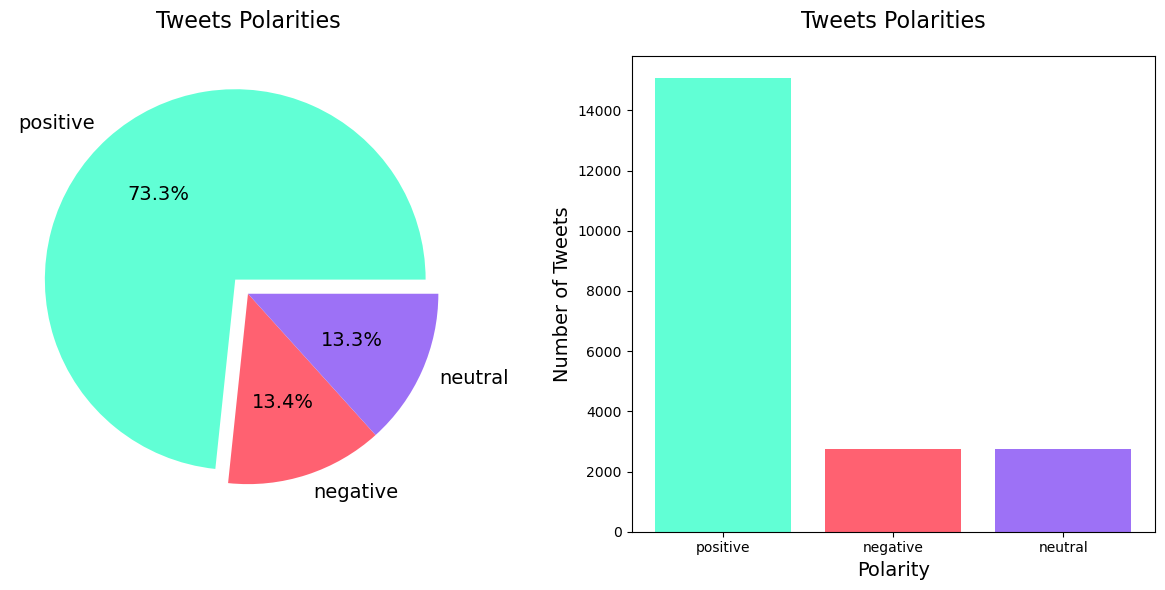

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
x = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
colors = ['#61FFD5', '#FF6171', '#9D71F6']
ax1.pie(x=x, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14}, colors=colors)
ax1.set_title('Tweets Polarities', fontsize=16, pad=20)

# Bar chart
polarity_counts = tweets['polarity'].value_counts()
ax2.bar(polarity_counts.index, polarity_counts.values, color=colors)
ax2.set_title('Tweets Polarities', fontsize=16, pad=20)
ax2.set_xlabel('Polarity', fontsize=14)
ax2.set_ylabel('Number of Tweets', fontsize=14)

plt.tight_layout()
plt.show()


In [19]:
# طباعة أكثر التغريدات إيجابية
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['tweet_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,tweet_clean,polarity_score,polarity
1,عرف الموقع التاريخي بداية ب قصر جبره والذي يقال انه بني عام ه وينسب القصر للشريفه نفيسه بنت عبدالاله باشا زوجة ملك الحجاز الشريف علي باشا ويقع بمنطقة جبره في الشمال الشرقي من محافظة الطائف وثم امتلكه الوزير بن سليمان ورممه وسمي ب «قصر ابن سليمان» إذ كان يعهده الوزير عبدالله السليمان رحمه الله واكتسب أهميته بعد أن سكنه الملك سعود بن عبدالعزيز حين كان وليا للعهد ويوجد في بوابته نقش لتاريخ الانشاء او الترميم وكانت مرصودة بتاريخه م وكتب في اعلى البوابة الآية وجعلنا من الماء كل شئ حي والروايات تذكر أن الوزير السليمان في عهد الملك عبدالعزيز قام ببناء وترميم هذا القصر وكان الملك عبدالعزيز يقضي الصيف في الطائف بهذا القصر ويستقبل الرؤساء والمسؤولين وسمي القصر بقصر الضيافة الملكي وقد استقبل الملك عبدالعزيز رحمه الله أول لقاء مع أول رئيس لجمهورية لمصر آنذاك محمد نجيب في عام م بالقصر الملكي وليس هذا القصر بالطائف حيث استقبل الرئيس نجيب في نفس العام هجرية والتي صدر فيها أمر ملكي بتعيين الامير نواف بن عبد العزيز آل سعود أميراً للقصور والحرس الملكي واستقبل الرئيس نجيب في القصر نفسه بداية ثم انتقل للقصر الملكي بالطايف للقاء الملك عبدالعزيز كما سلم الوزير بن سليمان في قصر الضيافة هذا هدايا للرئيس نجيب وبعدها انتقل الجميع للقصر الملكي بوسط الطايف بضيافة الملك عبدالعزيز رحمه الله وليس هنا وبني القصر على الطراز المعماري القديم واما مايتبادر كونه لجبرة المخزومية الاموية فهذا ليس عليه دليل واضح وقد يكون على آثار قصر قديم والله اعلم وزار هذا المعلم أستاذ التاريخ والحضارات الإسلامية بجامعة أم القرى الدكتور فواز الدهاس وذكر أن ما يميز هذا القصر هو وقوعه بجوار المكان الذي وقعت فيه معركة « حنين » وما شهدته من المشروع العملاق للسيدة زبيدة زوجة هارون الرشيد حتى ان البركة وسط القصر تشابه لحد كبير تصاميم برك زبيدة وحول مشروع زبيدة مياه المزارع من آبار وعيون في تلك المنطقة إلى مكة المكرمة لسد حاجة حجاج بيت الله الحرام في الزمن الماضي الى قناة زبيدة في مكة ونلاحظ ان القصر بني بالحجارة وروعي في اتخاذ موقع القصر أمران أحدهما أن يكون في منأى عن السيول الجارفة وهو يقع في وادي إبراهيم والآخر ليعطي منظرا خلابا للمزارع التي تحيط به من كل الجوانب نقل وترتيب الرحالوائلالدغفق رحالالخبره,77,positive
2,والله رهيبة بشكل مو طبيعي وحلوة جداً في الشتاء الماء صافي تحس ودك تنط لكن ماتقدر جلسات تفتح النفس لكن انتبه تجيها وقت رش العشب لأن الجزيرة كلها ب تصير طين أخذت اسمها من طائر النورس أحد الطيور البحرية المستوطنة مما يدل على بيئتها الرائعة لأنواع كثيرة من الطيور فموقعها على ساحل البحر الأحمر وما تكتنز به من مكونات وعوامل جعلها جاذبة لتكون تجمعًا رائعًا للطيور ومن أهم مناطق تجمع طيور النورس وواحدة من أهم الوجهات السياحية في المملكة تتربع جزيرة النورس بينبع الصناعية على مساحة تقدر ب م وجرى تصميمها من قبل مهندسين سعوديين بالهيئة الملكية بينبع لتشكل أيقونة رائعة مليئة بالإبداع وتجسد جمال التصميم الشاعري والجذاب مانحه الزوار الهدوء والإلهام وإطلالة خلابة على البحر الأحمر من مختلف الجهات وفي موقع فريد قرب مشروع الواجهة البحرية الذي قامت بإنشائه الهيئة الملكية بينبع بطول كلم ومنطقة مطاعم ومنطقة ألعاب ترفيهية مغلقة وخيارات متنوعة للزوار والمتنزهين وبمناسبة اختيار ينبع ضمن الوجهات المعتمدة لموسم صيف السعودية تنفس الذي انطلق أخيرا ويستمر حتى سبتمبر تقدم جزيرة النورس وجهاً ترحيبياً ومضيافاً للزوار كأحد الوجهات السياحية للزوار حيث جهزت لاستقبال الزوار والمتنزهين وممارسي الهوايات فيما باتت مقصداً لقوارب النزهة واللنشات السياحية لشواطئها لقضاء يوماً عليها حيث تتميز بشواطئ مميزة ومياه صافية ومحبي الغوص سيستمتعون بمشاهدة الشعاب المرجانية النادرة وكذلك مناطق مفتوحة ألعاب للأطفال تم إنشائها وفق أفضل المواصفات الفنية ومتطلبات الأمان والسلامة وتحظي الجزيرة التي افتتحت رسمياً عام ه بأهمية اقتصادية وسياحية ومعلماً مميزاً بطابع بيئي يضاهي أجمل المناطق السياحية بجمالها ورعة تخطيطها الشاملة بكل المقاييس فيما يتزايد اهتمام السائحين والزوار بزيارتها طوال العام وبالرغم من حداثة الجزيرة إلا أنها سرعان ما اشتملت على العديد من المرافق والخدمات التي تلبي كافة احتياجات المتنزهين بالإضافة إلى حرص الهيئة الملكية بينبع على نيل رضا الزوار من خلال تقديم أفضل الخدمات لزائري الجزيرة بمختلف فئاتهم العمرية,74,positive
3,متحف حائل سياحة مشوقة عبر الزمن في شتاء السعودية زاد تسليط الضوء على متحف حائل وذلك بعد إدراجه ضمن الفعاليات السياحية المُقدمة من القطاع الخاص السياحي في موسم شت

In [20]:
# طباعة أكثر التغريدات سلبية
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['tweet_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,tweet_clean,polarity_score,polarity
1,سيئة للغاية أسعار مبالغ فيها طريقة استخدام الباصات لدخول مدائن صالح ووقت الزيارة والجولة سيء أيضا لم يراعوا من جاء من مسافات طويلة لزيارتها حتى أسعار الشقق مبالغ فيه جدا,-15,negative
2,بحيرة الأصفر هي بحيرة تقع في العمران شرق الأحساء بالسعودية وتعتبر أكبر تجمع مائي في منطقة الخليج كانت البحيرة تسمى سابقاً ببحيرة هجر للبحيرة أهمية كبيرة فهي تستوعب المياه الزائدة من الأمطار الغزيرة وتحمي المنطقة من المستنقعات عبر المصارف المفتوحة كما أنها مصدر رزق للأهالي ومصدراً للحشائش التي تستخدم أعلافاً للمواشي وكذلك للأسماك الصغيرة وبعض النباتات التي تستخدم في عمليات التصنيع كنبات الأسل إلى جانب ذلك إنها كانت تعتبر بيئة طبيعية حاضنة لكثير من الحيوانات والطيور المقيمة والمهاجرة وتعتبر بحيرة الأصفر بواحة الأحساء البحيرة الوحيدة في المملكة التي تعيش فيها حياة فطرية متكاملة كانت تسمى البحيرة سابقاً ببحيرة هجر ثم أخذت اسمها الحالي من الأصفر الثعلبي حاكم المنطقة سابق عتمد مصدر مياه البحيرة الأساسي على مياه الصرف الزراعي تسير فيها قنوات الصرف لتتجمع في قناة واحدة رئيسة تصب في نهاية البحيرة واعتمدت على المصارف الأهلية لتغذيتها بمياه مصارف سقي النخيل والمزارع تأتي مياه البحيرة حالياً من مياه مصارف ري المزارع ومياه الصرف الصحي المعالج بشكل كامل الآتي من محطات الهفوف والمعالج بشكل جزئي بالترسيب والتعقيم بالكلور فقط وهو القادم من محطة العمران والذي كان له أثر سلبي لطبيعتها وخصائصها وعلى الحياة الفطرية والطبيعية كما تلعب البحيرة دوراً آخر في الشتاء حيث تنقل هذه المصارف مياه الأمطار إليها تحيط بالبحيرة الكثبان الرملية ولذا يعتبر الوصول إليها أمراً شاقاً تنمو حول البحيرة العديد من النباتات الصحراوية المختلفة منها نبات الطرفاء والأرطى والشنان والسرخس الذي ينمو بكثافة حول أطرافها وعند انحسار المياه صيفاً تكون مرعى للأغنام والإبل ويخيم حولها جمع من أهل البادية تعد البحيرة محطة استراحة لهجرات الطيور المختلفة التي تعبر مرتين في العام من الشمال إلى الجنوب ومن الجنوب إلى الشمال وتتنوع هذه الطيور من كبيرها كالبط والأوز إلى صغيرها كالبلابل والعصافير كما تضم البحيرة أسماكاً بأحجام مختلفة نتيجة لعدم اصطيادها من قبل مرتادي البحيرة كما يعيش في البحيرة السلاحف وعدد من الحيوانات البرمائية والضفادع بالإضافة إلى أنواع الأعشاب المائية و الطحالب المغذية للحياة الفطرية والتي تتحمل الكثير من الملوحة مثل الكرغل والسويداء والعقربان وغيره,-14,negative
3,دورات مياة النساء قذرة جداً جداً كلمة قذرة قليلة بحقها بعض الأبواب ماتتسكر غير أن بعض النساء ترمي زبالتها وزبالة اطفالها بالأرض والزبالة مليانة والطشاش بالأرض بين الوسخ واحياناً مافي مويه الحمامات متهالكه تحتاج صيانة وتجديد يعني مادري كيف اوصف القذارة إلي شفتها اتمنى مايتكرر المشهد بقية المرافق جميلة جداً حقيقة,-14,negative
4,والله المكان رائع زي ماتركته من ٧ سنين لكن الاوضاع مازالت زي ماهي اماكن الحيوانات مش نضيفه وحتى المي حقتهم وسخة جدا في اماكن جديدة معتنى فيها احسن من الباقي الفيله تزعل تحسها كئيبة وبشرتها جافة ولونهم أصفر وفوق كده دخلنا متأخر جدا وكان انتظار طويل ياريت تنتبهو,-14,negative
5,للاسف البيك في المنطقه الشرقيه ادارتهم فاشله خمسين موظف في الفرع رئيسهم فاشل عشان تشتري راح تحتاج ساعه او اكثر اذا قدامك ٢٠ شخص بس طابور نص ساعه او اكثر والكاشير بطيئ ١٠ دقائق او اكثر اذا قدامك ٤ او ٥ اشخاص واللي يجهز الطلب ياخذ نص,-13,negative
6,مشوار طويل لمهرجان عادي جدا فقد هو مجمع للبيع بأغلى سعر مع شدة الرطوبة كانت تجربة سيئة جدا والحشمة والحجاب في المكان تبدو مستغربة جدا,-13,negative
7,كان المكان كالمعتاد مزدحم جدا جدا ووقت الانتظار يحتاج الى توسعة وموقع مناسب يوفر مقاعد اكثر ومواقف لسيارات الاسعار مرتفعة قليلا,-12,negative
8,خايس جدا مافي شى يستاهل تدفع فلوس تلاقي ناس زباله اهمال في كل شى غيرك العينات اللي تجيب المرض أعوذ بالله,-12,negative
9,للأسف المدخل والمواقف أسوء بدايه طريق ترابي بدون اي تنظيم كشك التذاكر بالشارع تنتظر بالشمس بشكل عام اهم معلم سياحي بالطائف يفتقر للخدمات والجوده عربات التلفريك جديده والمسار طويل يستحق التجربه بالاسفل منطقه الالعاب تحتاج للتطوير,-11,negative
10,لايعجبني ازعاج وعدم تنظيم للماره لايوجد اماكن متوفره للماء ولا فائده للزائر لايستطيع الشراء وحتى لاتوجد كراسي للماره ازعاج ومضايقات من شباب بلا عوائل ليت التنظيم القادم يوم شباب ويوم عوائل ويكثر من حراس الأمن,-11,negative


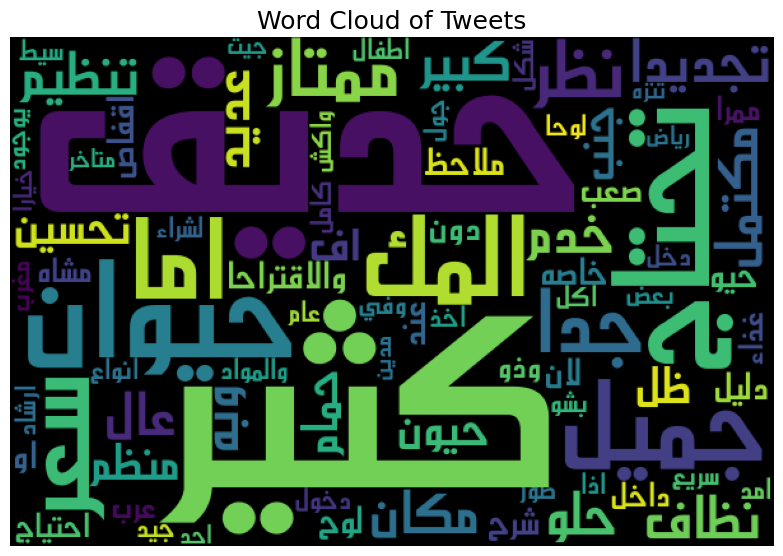

In [22]:
# سحابة الكلمات
from wordcloud import WordCloud
# مكتبة للغة العربية
import arabic_reshaper
from bidi.algorithm import get_display
# انتقاء بعض الكلمات المعالجة
list_words=''
i=0
for tweet in tweets['tweet_preprocessed']:
    for word in tweet:
        i=i+1
        if i>100:
            break
        list_words += ' '+(word)
# ضبط اللغة العربية
reshaped_text = arabic_reshaper.reshape(list_words)
artext = get_display(reshaped_text)
# إعدادات سحابة الكلمات
wordcloud = WordCloud(font_path='DroidSansMono.ttf', width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(artext)
fig, ax = plt.subplots(figsize = (8, 6))
# عنوان السحابة
ax.set_title('Word Cloud of Tweets', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


In [23]:
# تجميع الكلمات الموجبة والكلمات السالبة
def words_with_sentiment(list_words):
    positive_words=[]
    negative_words=[]
    for word in list_words:
        score_pos = 0
        score_neg = 0
        if (word in dict_positive):
            score_pos = dict_positive[word]
        if (word in dict_negative):
            score_neg = dict_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

C:\Users\Hadjer\AppData\Local\Temp\ipykernel_55408\833678241.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=0)


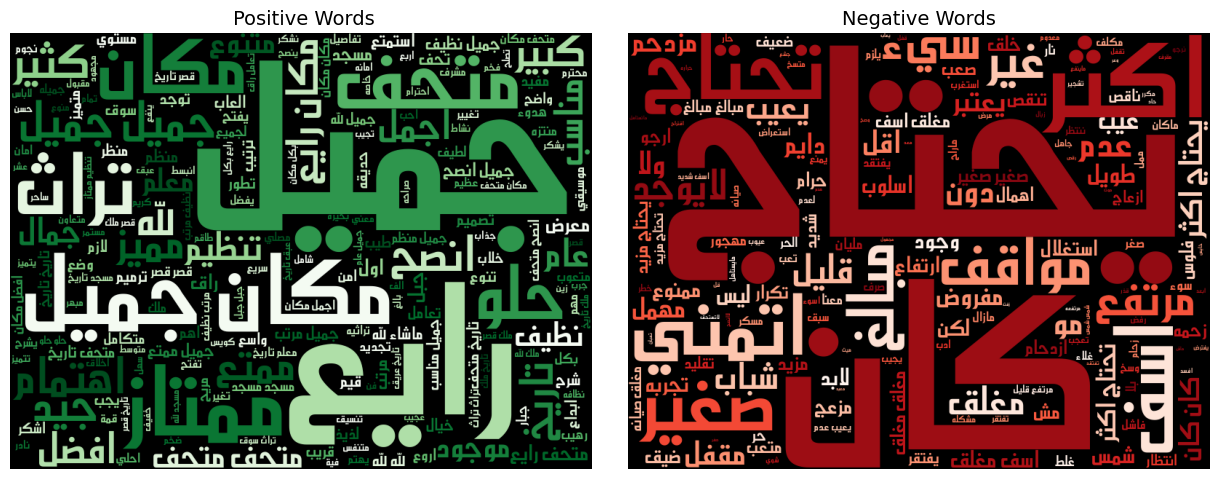

In [24]:
# سحابة الكلمات الموجبة والسالبة
# فرز الكلمات الموجبة والسالبة
sentiment_words = tweets['tweet_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
# قائمة الكلمات الموجبة
positive_words = sentiment_words[0]
# قائمة الكلمات السالبة
negative_words = sentiment_words[1]
# سحابة الكلمات الموجبة
fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_words_postive)
artext = get_display(reshaped_text)

wordcloud_positive = WordCloud(font_path='DroidSansMono.ttf',width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(artext)
ax[0].set_title(' Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')
# سحابة الكلمات السالبة
list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
reshaped_text = arabic_reshaper.reshape(list_words_negative)
artext = get_display(reshaped_text)

wordcloud_negative = WordCloud(font_path='DroidSansMono.ttf',width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(artext)
ax[1].set_title('Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [34]:
# !pip install tensorflow==2.12.0
# تحويل التغريدات إلى أشعة رقمية
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# نركيب جمل التغريدات من المفردات المعالجة
sentences = tweets['tweet_preprocessed'].apply(toSentence)
print(sentences.values[25]) 
max_words = 5000
max_len = 50
#   التصريح عن المجزئ 
#   مع تحديد عدد الكلمات التي ستبقى 
#  بالاعتماد على تواترها 
tokenizer = Tokenizer(num_words=max_words )
# ملائمة المجزئ لنصوص التغريدات
tokenizer.fit_on_texts(sentences.values)
# تحويل النص إلى قائمة من الأرقام
S = tokenizer.texts_to_sequences(sentences.values)
print(S[0]) 
# توحيد أطوال الأشعة
X = pad_sequences(S, maxlen=max_len)
print(X[0]) 
X.shape

ModuleNotFoundError: No module named 'tensorflow'

In [35]:
# ترميز الخرج
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
# توليد شعاع الخرج
y = tweets['polarity'].map(polarity_encode).values

# مكنبة تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

NameError: name 'X' is not defined

In [36]:

# تضمين النموذج التسلسلي
from keras.models import Sequential
# تضمين  الطبقات اللازمة
from keras.layers import Embedding, Dense, LSTM
# دوال التحسين
from tensorflow.keras.optimizers import Adam, RMSprop 

# التصريح عن دالة إنشاء نموذج التعلم
# مع إعطاء قيم أولية للمعاملات المترفعة
def create_model(embed_dim = 32, hidden_unit = 16, dropout_rate = 0.2, optimizers = RMSprop, learning_rate = 0.001):
    # التصريح عن نموذج تسلسلي
    model = Sequential()
    # طبقة التضمين
    model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))
    # LSTM
    model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))
    # الطبقة الأخيرة
    model.add(Dense(units = 3, activation = 'softmax'))
    # يناء النموذج
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
    # طباعة ملخص النموذج
    print(model.summary())
 
    return model

ModuleNotFoundError: No module named 'tensorflow'

In [37]:
# تحتاج وقت للتنفيذ
'''
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# حساب القيم الأمثلية للمعاملات المترفعة
model = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) 

# بعص القيم الممكنة للمعاملات المترفعة   
embed_dim = [32, 64]
hidden_unit = [16, 32, 64]
dropout_rate = [0.2]
optimizers = [Adam, RMSprop]
learning_rate = [0.01, 0.001, 0.0001]
epochs = [10, 15,  25 ]
batch_size = [128, 256]
param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate,
                learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# تقويم النموذج لاختيار أفضل القيم
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
grid_result = grid.fit(X_train, y_train)

results = pd.DataFrame()
results['means'] = grid_result.cv_results_['mean_test_score']
results['stds'] = grid_result.cv_results_['std_test_score']
results['params'] = grid_result.cv_results_['params']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# حفظ النتائج
results.to_csv(r'gridsearchcv_results.csv', index = False, header = True)
results.sort_values(by='means', ascending = False).reset_index(drop=True)
'''


'\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\n# حساب القيم الأمثلية للمعاملات المترفعة\nmodel = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) \n\n# بعص القيم الممكنة للمعاملات المترفعة   \nembed_dim = [32, 64]\nhidden_unit = [16, 32, 64]\ndropout_rate = [0.2]\noptimizers = [Adam, RMSprop]\nlearning_rate = [0.01, 0.001, 0.0001]\nepochs = [10, 15,  25 ]\nbatch_size = [128, 256]\nparam_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate,\n                learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)\n\n# تقويم النموذج لاختيار أفضل القيم\ngrid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)\ngrid_result = grid.fit(X_train, y_train)\n\nresults = pd.DataFrame()\nresults[\'means\'] = grid_result.cv_results_[\'mean_test_score\']\nresults[\'stds\'] = grid_result.cv_results_[\'std_test_score\']\nresult

In [45]:
'''
# قراءة نتائج معايرة المعاملات المترفعة
results = pd.read_csv('gridsearchcv_results.csv')
results.sort_values(by='means', ascending = False).reset_index(drop=True)
print (results)
'''

"\n# قراءة نتائج معايرة المعاملات المترفعة\nresults = pd.read_csv('gridsearchcv_results.csv')\nresults.sort_values(by='means', ascending = False).reset_index(drop=True)\nprint (results)\n"

In [46]:
# حساب أوزان القطبيات
posCount=0
negCount=0
neuCount=0
# حساب عدد التغريدات الموجبة والسالبة والمحايدة
for index, row in tweets.iterrows():
    if row['polarity']=='negative':
        negCount=negCount+1
    elif row['polarity']=='positive':
        posCount=posCount+1
    else:
        neuCount=neuCount+1
print(negCount,  neuCount, posCount)        
total=posCount+ negCount+  neuCount
# حساب النسب
weight_for_0 = (1 / negCount) * (total / 3.0)
weight_for_1 = (1 / neuCount) * (total / 3.0)
weight_for_2 = (1 / posCount) * (total / 3.0)
print(weight_for_0, weight_for_1, weight_for_2)

class_weight = {0: weight_for_0, 1: weight_for_1, 2:weight_for_2}

2743 2733 15059
2.4954429456799123 2.504573728503476 0.45454545454545453


In [47]:
# مكتبة التصنيف
from keras.wrappers.scikit_learn import KerasClassifier

# إنشاء النموذج مع قيم المعاملات المترفعة الأمثلية

model = KerasClassifier(build_fn = create_model,
                        # معاملات النموذج
                        dropout_rate = 0.2,
                        embed_dim = 32,
                        hidden_unit = 64,
                        optimizers = Adam,
                        learning_rate = 0.001,
                        # معاملات التدريب
                        epochs=10, 
                        batch_size=256,
                        # نسبة بيانات التقييم
                        validation_split = 0.1)
# ملائمة النموذج مع بيانات التدريب
# مع موازنة الصفوف الثلاثة
model_prediction = model.fit(X_train, y_train, class_weight=class_weight)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 185,027
Trainable params: 185,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
58/58 [==============================] - 11s 157ms/step - loss: 1.0498 - accuracy: 0.4716 - val_loss: 0.8580 - val_accuracy: 0.7145
Epoch 2/10
58/58 [==============================] - 9s 147ms/step - loss: 0.7955 - accuracy: 0.7291 - val_loss: 0.6773 - val_accuracy: 0.7225
Epoch 3/10
58/58 [==============================] - 9s 149ms/step - loss: 0.5185 - accurac

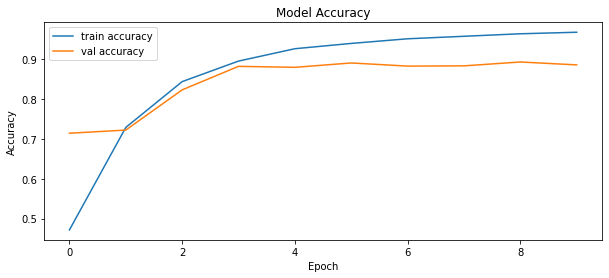

In [48]:
# معاينة دقة النموذج
# التدريب والتقييم
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

Model Accuracy on Test Data: 89.70051132213295
Model Precision on Test Data: 91.02556807718665
Model Recall on Test Data: 89.70051132213295
Model F1 on Test Data: 90.08795908247768

Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.81
Macro Recall: 0.82
Macro F1-score: 0.81

Weighted Precision: 0.91
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

     Class 1       0.83      0.71      0.77       519
     Class 2       0.62      0.82      0.70       559
     Class 3       0.98      0.94      0.96      3029

    accuracy                           0.90      4107
   macro avg       0.81      0.82      0.81      4107
weighted avg       0.91      0.90      0.90      4107



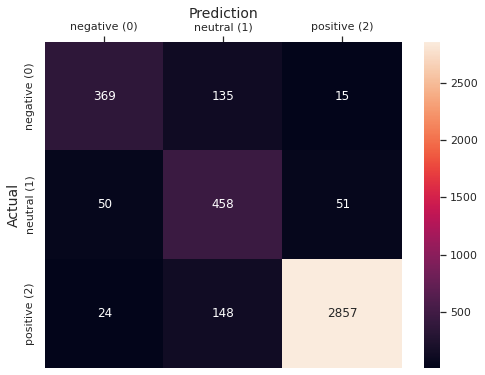

In [49]:
# مقاييس الأداء

# مقياس الصحة
from sklearn.metrics import accuracy_score 
# مقياس الدقة
from sklearn.metrics import precision_score
# مقياس الاستذكار
from sklearn.metrics import recall_score
# f1
from sklearn.metrics import f1_score
# مصفوفة الارتباك
from sklearn.metrics import confusion_matrix
# تصنيف بيانات الاختبار
y_pred = model.predict(X_test)
# حساب مقاييس الأداء
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred , average='weighted')
recall= recall_score(y_test, y_pred, zero_division=1, average='weighted')
f1= f1_score(y_test, y_pred, zero_division=1,  average='weighted')

print('Model Accuracy on Test Data:', accuracy*100)
print('Model Precision on Test Data:', precision*100)
print('Model Recall on Test Data:', recall*100)
print('Model F1 on Test Data:', f1*100)

confusion_matrix(y_test, y_pred)

# مقاييس الأداء في حالة أكثر من صفين
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

import seaborn as sns
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
plt.show()

In [50]:
# تصنيف مجموعة اختبار
text_clean = tweets['tweet_clean']
text_train, text_test = train_test_split(text_clean, test_size = 0.2, random_state = 0)
result_test = pd.DataFrame(data = zip(text_test, y_pred), columns = ['text', 'polarity'])
polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
result_test['polarity'] = result_test['polarity'].map(polarity_decode)
pd.set_option('max_colwidth', 300)
# حفظ النتائج
result_test.to_csv("results.csv")
result_test

,text,polarity
0,مكان جدا جميل وانصح به لانه الوحيد من نوعه في مدينة ينبع من حيث الاشجار والبحيره والطيور المهاجره وايضا السلاحف,Positive
1,يقع مشروع بوليفارد الرياض في حي حطين السكني طريق الأمير تركي الأول مخرج والذي يعتبر أحد أرقى أحياء الرياض الجديدة وعلى بعد مسافة لا تذكر من مركز الملك عبد الله المالي الذي سوف يشكل علامة فارقة في عالم المال والأعمال بالرياض عند اكتمال,Positive
2,المكان جميل والأكل ممتاز لكن الأسعار مبالغ فيها وهناك استغلال مثلا الغرفه بخمسين ريال وتذكرة الدخول بعشرين والمعامله سيئة,Positive
3,جميل جدا التنظيم تطور كثير ولكن أسعار الأكل والشرب مبالغ فيها غاليه,Positive
4,تحفة هندسية رائعة بجميع التفاصيل شكرا لكل من سعى وبذل لوجود مثل هذا الصرح المركز عبترة عن حدائق ومسرح ومكتبة ومناطق للالعاب خاصه للاطفال ومركز تعريفي بالنفط وجميع ما يتعلق به,Positive
...,...,...
4102,روعه جدا جدا جدا,Neutral
4103,في غاية الروعة الحديقة عبارة عن مسطح اخضر ووجود ملاهي اطفال وبحيرتين تحيطها أشجار متنوعة,Positive
4104,جدا ممتازه وتحتاج الى اهتمام كبير,Positive
4105,شي جميل ولكن نرغب في أن يكون أفضل بكثير,Positive
